<div style="font-size:18pt; padding-top:20px; text-align:center; line-height: 1.5;">СЕМИНАР 4. <b>Оптимизация. Часть 1.</b> Метод наименьших квадратов, градиентный спуск и <span style="font-weight:bold; color:green">NumPy/SciPy</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Постановка задачи</a></li>
        <li><a href="#2">Производная</a></li>
        <li><a href="#3">Метод наименьших квадратов</a>
            <ol style = "list-style-type:lower-alpha">
                <li><a href="#3a">Матричная форма записи системы уравнений</a></li>
                <li><a href="#3b">Метод наименьших квадратов в задаче линейной регрессии</a></li>
            </ol>
        </li>
        <li><a href="#4">Градиентный спуск</a>
            <ol style = "list-style-type:lower-alpha">
                <li><a href="#4a">Градиентный спуск</a></li>
                <li><a href="#4b">Градиентный спуск в задаче линейной регрессии</a></li>
            </ol>
        </li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Постановка задачи</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [3]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

<p>Создаем DataFrame с исходными данными</p>

In [4]:
df1 = pnd.read_csv("SAT_GPA.csv", sep=" ")
df1.head(5)

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


In [5]:
sx = df1["high_GPA"]
sy = df1["univ_GPA"]

<p>Отображаем исходные данные</p>

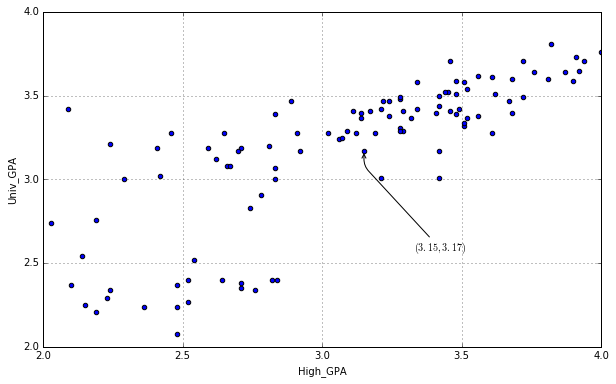

In [6]:
plt.figure("1", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx, sy)
plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")
plt.axis([2, 4, 2, 4])
plt.grid(True)
ax.set_axisbelow(True) 

xA = df1.loc[36, "high_GPA"]
yA = df1.loc[36, "univ_GPA"]
xyA = "$("+str(xA)+","+str(yA)+")$"
plt.annotate(xyA, xy=(xA, yA), xytext=(50, -100), xycoords='data', textcoords='offset points', 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=0,angleB=-90,armB=15,rad=7"),)
plt.show()

In [7]:
slope_1 = 2.0; slope_2 = 0.7; slope_3 = 0.4
intercept_1 = -3.0; intercept_2 = 1.1; intercept_3 = 2.0

In [8]:
f_pred_1 = lambda x: slope_1 * x + intercept_1
f_pred_2 = lambda x: slope_2 * x + intercept_2
f_pred_3 = lambda x: slope_3 * x + intercept_3

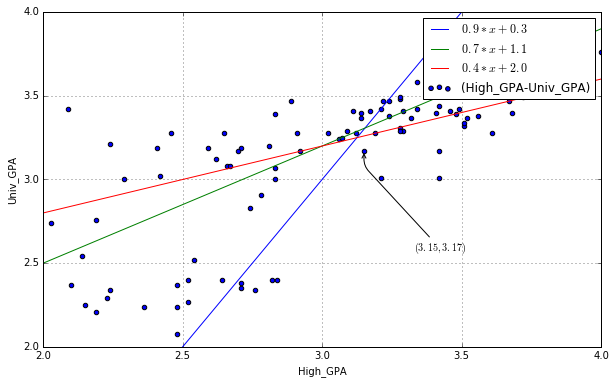

In [9]:
x_line = np.array([1.5, 4.5])

plt.figure("2", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx, sy, label="(High_GPA-Univ_GPA)")
plt.plot(x_line, f_pred_1(x_line), "-", label="$0.9*x+0.3$")
plt.plot(x_line, f_pred_2(x_line), "-", label="$0.7*x+1.1$")
plt.plot(x_line, f_pred_3(x_line), "-", label="$0.4*x+2.0$")

plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

plt.axis([2, 4, 2, 4])

plt.grid(True)
ax.set_axisbelow(True)

plt.legend()

xA = df1.loc[36, "high_GPA"]
yA = df1.loc[36, "univ_GPA"]
xyA = "$("+str(xA)+","+str(yA)+")$"
plt.annotate(xyA, xy=(xA, yA), xytext=(50, -100), xycoords='data', textcoords='offset points', 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=0,angleB=-90,armB=15,rad=7"),)
plt.show()

Какая функция лучше определяет зависимость между High_GPA и Univ_GPA?

In [10]:
y_pred_1 = f_pred_1(sx)
y_pred_2 = f_pred_2(sx)
y_pred_3 = f_pred_3(sx)

In [11]:
err_1 = ((y_pred_1 - sy)**2).sum()
err_2 = ((y_pred_2 - sy)**2).sum()
err_3 = ((y_pred_3 - sy)**2).sum()

err_1, err_2, err_3

(56.9407, 8.858585999999994, 10.604604000000004)

$\hat w_1, \hat w_2 =\operatorname*{arg\,min}_{w_1, w_2} 
\displaystyle\sum_{i=1}^{N} ((w_2 x_i+w_1) - y_i)^2$

# найти две частные производные по w1 и w0

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Производная</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [13]:
from scipy.misc import derivative

In [14]:
x0 = -4
f = lambda x: x**2

In [15]:
df_x0 = derivative(f, x0, n=1) #n - порядок производной
df_x0

-8.0

In [16]:
ddf_x0 = derivative(f, x0, n=2)
ddf_x0

2.0

In [17]:
x_st = -4
x_end = 5
step = 1

x = np.arange(x_st, x_end, step)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [18]:
df = derivative(f, x, n=1)
df

array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8.])

In [19]:
ddf = derivative(f, x, n=2)
ddf

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

In [20]:
f_neg = lambda x: - x**2

In [21]:
df_neg = derivative(f_neg, x, n=1)
ddf_neg = derivative(f_neg, x, n=2)

df_neg, ddf_neg

(array([ 8.,  6.,  4.,  2.,  0., -2., -4., -6., -8.]),
 array([-2., -2., -2., -2., -2., -2., -2., -2., -2.]))

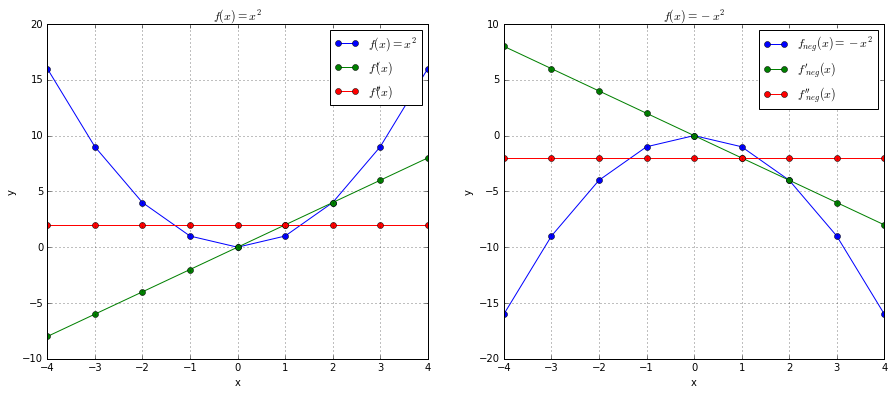

In [22]:
plt.figure("4", figsize=[15,6])

ax1 = plt.subplot(1,2,1)

plt.plot(x, f(x), "-o", label="$f(x)=x^2$")
plt.plot(x, df, "-o", label="$f'(x)$")
plt.plot(x, ddf, "-o", label="$f''(x)$")

plt.title("$f(x)=x^2$")

plt.xlabel("x")
plt.ylabel("y")

plt.grid(True)

plt.legend()

ax2 = plt.subplot(1,2,2)

plt.plot(x, f_neg(x), "-o",  label="$f_{neg}(x)=-x^2$")
plt.plot(x, df_neg, "-o", label="$f'_{neg}(x)$")
plt.plot(x, ddf_neg, "-o", label="$f''_{neg}(x)$")

plt.title("$f(x)=-x^2$")

plt.xlabel("x")
plt.ylabel("y")

plt.grid(True)

plt.legend()

plt.show()

In [23]:
x = np.arange(-10, 10, 0.1)
f = lambda x: x**2 + 10 * np.sin(x)

In [24]:
df = derivative(f, x, n=1)
ddf = derivative(f, x, n=2)

In [25]:
indx = np.where(np.logical_and(df >= -0.35, df <= 0.25)) #индексы элементов,у которых 1я роизводная = 0
#так как таких точек нет, то задаем приближение - от -0.35 до 0.25

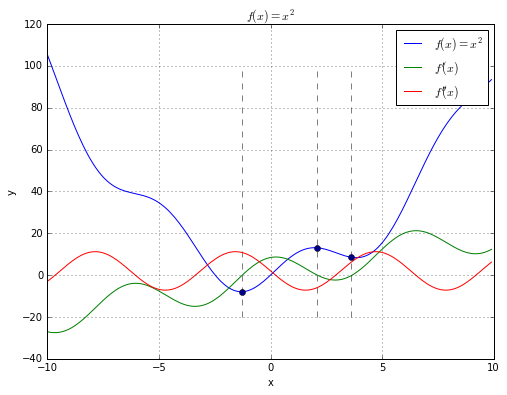

In [26]:
plt.figure("4", figsize=[8,6])

ax1 = plt.subplot(1,1,1)

plt.plot(x, f(x), "-", label="$f(x)=x^2$")
plt.plot(x, df, "-", label="$f'(x)$")
plt.plot(x, ddf, "-", label="$f''(x)$")

plt.plot(x[indx], f(x[indx]), "o", color="darkblue")

plt.vlines(x[indx], ymin=-20, ymax=100, color="grey", linestyle="dashed", linewidth=1)

plt.title("$f(x)=x^2$")

plt.xlabel("x")
plt.ylabel("y")

plt.grid(True)

plt.legend()

plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Метод наименьших квадратов</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

y с крышкой = w1*xi+w0
e = y-y с крышкой = y-x*w
err = sum ei**2 = e транспонир. * e = (y-x*w) транспонир. * (y-x*w)
err = y транспонир. *y - y транспонир. * x *w - w транспонир. * х транспонир. * у + w транспонир. * x транспонир. * x* w
дифференциируем по w
-2*x транспонир. * w +2*x транспонир. * x*w = 0
...
w = (x транспонир. * х) ** -1 *x ранспонир. * y

<a name = "3a"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            a. Матричная форма записи системы уравнений
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#3">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#3b">Далее</a>
            </div>
        </div>
    </div>
</div>

<a name = "3b"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            b. Метод наименьших квадратов
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#3a">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#3c">Далее</a>
            </div>
        </div>
    </div>
</div>

<a name = "3c"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            c. Метод наименьших квадратов в задаче линейной регрессии
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#3b">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#4">Далее</a>
            </div>
        </div>
    </div>
</div>

In [28]:
X = np.asmatrix(np.c_[df1["high_GPA"].values, np.ones(df1["high_GPA"].size)])
X[:5,:2]

matrix([[ 3.45,  1.  ],
        [ 2.78,  1.  ],
        [ 2.52,  1.  ],
        [ 3.67,  1.  ],
        [ 3.24,  1.  ]])

In [29]:
y = np.asmatrix(df1["univ_GPA"].values.reshape(df1["univ_GPA"].values.size, 1))
y[:5]

matrix([[ 3.52],
        [ 2.91],
        [ 2.4 ],
        [ 3.47],
        [ 3.47]])

In [30]:
w = (X.T * X)**(-1) * X.T * y

# Вариант 2
# w = np.linalg.inv(X.T * X) * X.T * y
w

matrix([[ 0.6748299 ],
        [ 1.09682328]])

In [31]:
# NumPy linalg
np.linalg.lstsq(X, y)

(matrix([[ 0.6748299 ],
         [ 1.09682328]]),
 matrix([[ 8.15872337]]),
 2,
 array([ 33.52453432,   1.61027904]))

In [32]:
w0 = w[1,0]
w1 = w[0,0]

In [33]:
f_pred_ols = lambda x: w1 * x + w0

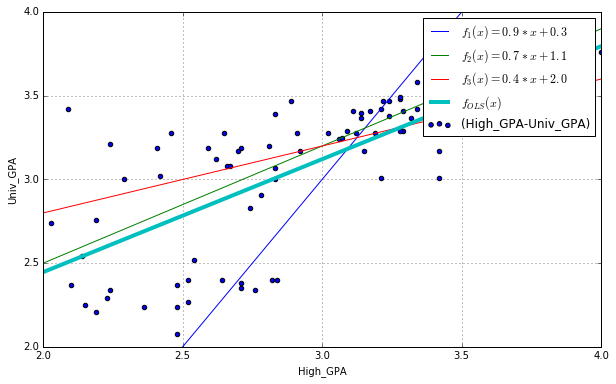

In [34]:
x_line = np.array([1.5, 4.5])

plt.figure("3", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx, sy, label="(High_GPA-Univ_GPA)")
plt.plot(x_line, f_pred_1(x_line), "-", label="$f_1(x)=0.9*x+0.3$")
plt.plot(x_line, f_pred_2(x_line), "-", label="$f_2(x)=0.7*x+1.1$")
plt.plot(x_line, f_pred_3(x_line), "-", label="$f_3(x)=0.4*x+2.0$")
plt.plot(x_line, f_pred_ols(x_line), "-", linewidth=4, 
         label="$f_{OLS}(x)$")

plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

plt.axis([2, 4, 2, 4])

plt.grid(True)
ax.set_axisbelow(True) 

plt.legend()

plt.show()

In [35]:
err_ols = ((f_pred_ols(sx) - sy)**2).sum()
err_ols

8.158723371974174

In [36]:
err_1, err_2, err_3, err_ols

(56.9407, 8.858585999999994, 10.604604000000004, 8.158723371974174)

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Градиентный спуск</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a name = "4a"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            a. Градиентный спуск
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#4">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#4b">Далее</a>
            </div>
        </div>
    </div>
</div>

$$ \mathbf{x}^{(i+1)} = \mathbf{x}^{(i)}-\bigtriangledown f \left( \mathbf{x}\right)$$

<p>Функция с одной переменной</p>

In [37]:
#Функция
def f(x):
    return x**2 + 10 * np.sin(x)

#Производная
def df(x):
    return 2*x + 10 * np.cos(x)

#Значения аргумента
x = np.arange(-10, 10, 0.1)

In [38]:
def plotFunc1D(x, f, df, strF):
    plt.grid(True)
    plt.plot(x, f(x))
    plt.plot(x, df(x))
    strF = "$" + strF + "$"
    plt.title(strF)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(("$f(x)$", "$f^{\prime}(x)$"), loc="lower right")

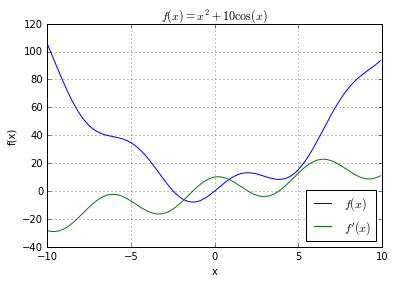

In [39]:
plotFunc1D(x, f, df, "f(x) = x^2+10\cos(x)")
plt.show()

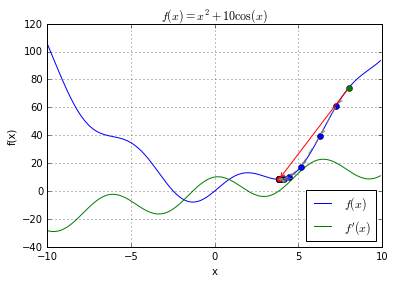

In [40]:
alpha = 0.05
x_min = 8
iterNum = 20

plotFunc1D(x, f, df, "f(x) = x^2+10\cos(x)")
plt.plot(x_min, f(x_min), 'o', color = "green")

for i in range(iterNum):
    xy = (x_min, f(x_min))
    
    x_min = x_min - alpha * df(x_min)
    
    plt.plot(x_min, f(x_min), 'o', color = "blue")
    plt.annotate("", xy=xy, xytext=(x_min, f(x_min)), arrowprops=dict(arrowstyle="<-", color="grey",  linestyle ="dashed"))
    
plt.plot(x_min, f(x_min), 'o', color = "red")
plt.annotate("", xy=(8,f(8)), xytext=(x_min, f(x_min)), arrowprops=dict(arrowstyle="<-", color="red"))
plt.show()

<p>Исследование влияния коэффициента альфа</p>

In [41]:
def plotInit(x, f, df, startX, alpha):
    plt.plot(x, f(x))
    plt.plot(x, df(x))
    plt.grid(True)
    strF = "Alpha = " + str(alpha) + ", Start Point: x = " + str(startX)
    plt.title(strF)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(("$f(x)$", "$f^{\prime}(x)$"), loc="lower right")
    plt.plot(startX, f(startX), 'o', color = "green")   

def plotEndState(x_min, f_min, startX, numI):
    plt.plot(x_min, f_min, 'o', color = "red")
    text = "Number of iterations: "+str(numI) + "\nx_min = " + \
        str(np.around(x_min, decimals = 2)) +", f_min = " + str(np.around(f_min, decimals = 2))
    plt.annotate(text, (0.15, 0.85), xytext=(0.15, 0.85), textcoords="axes fraction", size=14)

def plotStartEndPosition(x_curr, x_st, f_curr, f_st):
    plt.annotate("", xy=(x_st,f_st), xytext=(x_curr, f_curr), arrowprops=dict(arrowstyle="<-", color="red"))
    
def plotCurrentPoint(x_curr, x_prev, f_curr, f_prev):
    if abs(x_curr - x_prev) > 0.001 and abs(f_curr - f_prev) > 0.001:
        plt.annotate("", xy=(x_prev, f_prev), xytext=(x_curr, f_curr), arrowprops=dict(arrowstyle="<-", color="grey",  
                                                                                   linestyle ="dashed"))
    plt.plot(x_curr, f_curr, 'o', color = "blue")

In [42]:
def gradientDescent(alpha, f, df, iterNum, err, startX):
    
    x_min = startX
    x_min_prev = startX
    
    f_prev = f(startX)
    f_curr = 0
    
    i = 0
    stop = False
    
    while i < iterNum and not stop:
        
        x_min = x_min - alpha * df(x_min)
        f_curr = f(x_min)
        
        if abs(f_prev - f_curr) <= err:
            stop = True
        
        plotCurrentPoint(x_min, x_min_prev, f_curr, f_prev)
        
        x_min_prev = x_min
        f_prev = f_curr
        
        i += 1
                     
    return (x_min, f_curr, i)

In [43]:
def plotGraphics(st_x, maxIter, err, f, df, x, alphas):
    
    numPlt = len(alphas)
    numClmns = 2
    numRows = np.ceil(numPlt / numClmns)

    plt.figure(1, figsize=(numClmns*5, numRows*5))
    
    def plotOneGraphic(grNum, alpha):
        plt.subplot(numRows, numClmns,grNum+1)
        plotInit(x, f, df, st_x, alpha)
        x_min, f_min, numI = gradientDescent(alpha, f, df, maxIter, err, st_x)
        plotEndState(x_min, f_min, st_x, numI)
        plotStartEndPosition(x_min, st_x, f_min, f(st_x))

    
    [plotOneGraphic(i, alphas[i]) for i in range(numPlt)] 

In [44]:
f = lambda x: x**2 + 10 * np.sin(x) #Функция
df = lambda x: 2*x + 10 * np.cos(x) #Производная

x = np.arange(-10, 10, 0.1) #Значения x c шагом 0.1

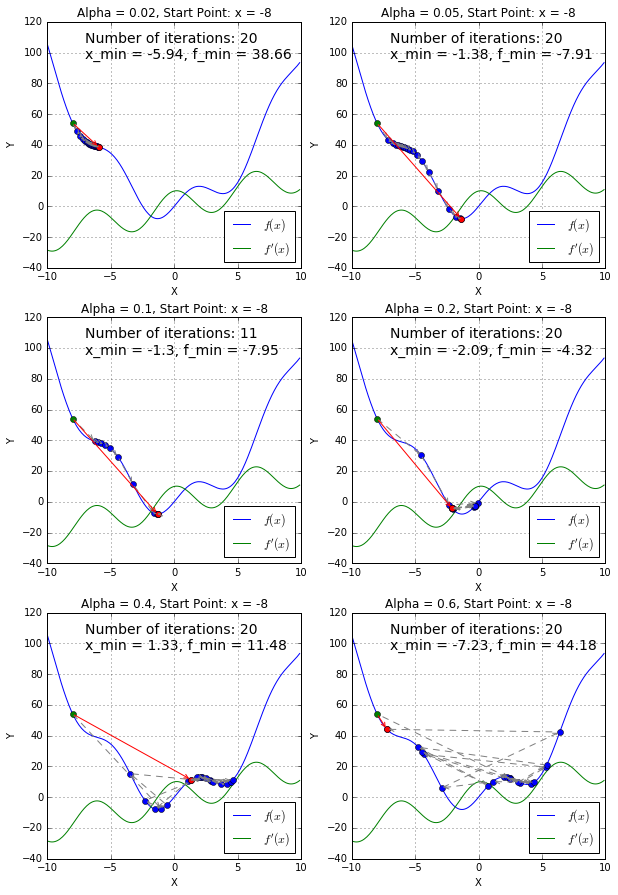

In [45]:
st_x = -8 #начальная точка
maxIter = 20 #максимальное количесвто интерация
err = 1e-3 #минимальное изменение финкции (ошибка)
alphas = [0.02, 0.05, 0.1, 0.2, 0.4, 0.6] #список коеффициентов alpha

plotGraphics(st_x, maxIter, err, f, df, x, alphas)

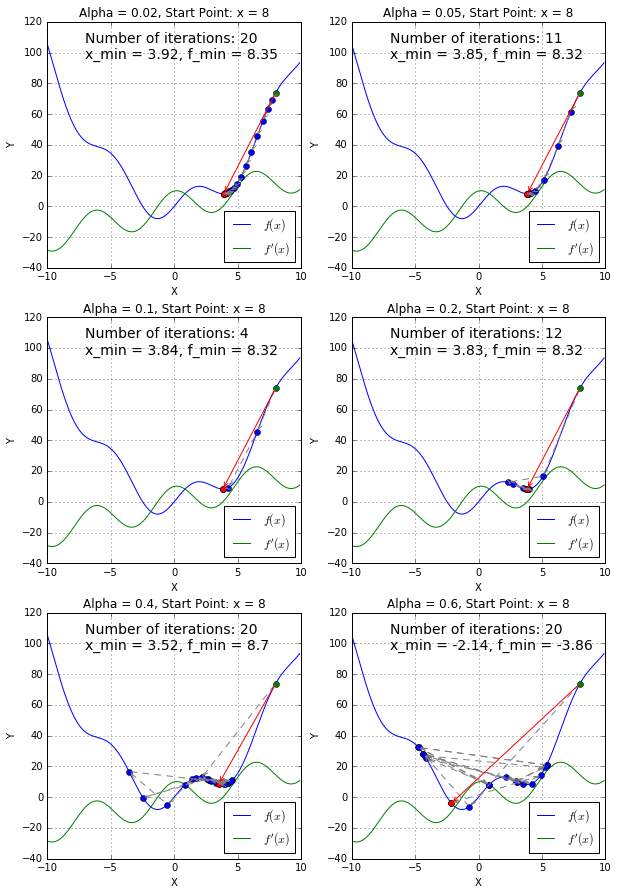

In [46]:
st_x = 8 #начальная точка
maxIter = 20 #максимальное количесвто интерация
err = 1e-3 #минимальное изменение финкции (ошибка)
alphas = [0.02, 0.05, 0.1, 0.2, 0.4, 0.6] #список коеффициентов alpha


plotGraphics(st_x, maxIter, err, f, df, x, alphas)

<p>Функция с двумя переменными</p>

In [47]:
f = lambda x, y: 2*x**2 + y**2 +x*y #Функция
dfx = lambda x, y: 2*x + y #Производная по x
dfy = lambda x, y: 2*y + x #Производная по y

coord_x = np.arange(-4, 5, 0.1) #Значения x c шагом 1
coord_y = np.arange(-4, 5, 0.1) #Значения x c шагом 1

x, y = np.meshgrid(coord_x, coord_y)

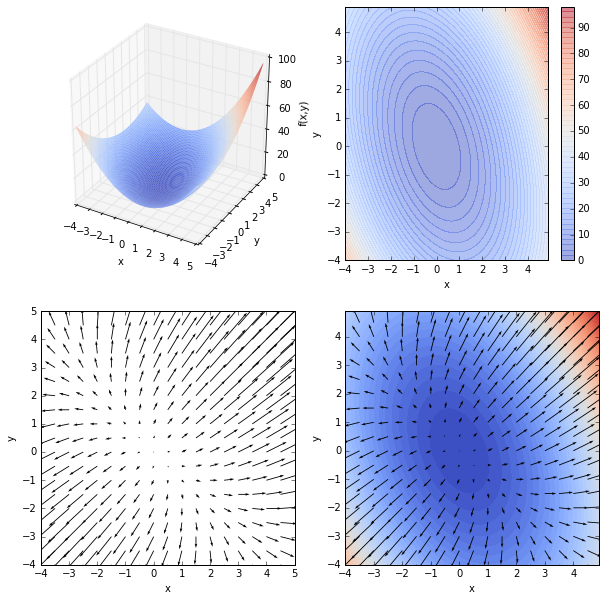

In [48]:
fig = plt.figure(1, figsize=(10, 10))

ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax0.plot_surface(x, y, f(x,y), rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel('f(x,y)')

ax1 = plt.subplot(2,2,2)
cf = ax1.contourf(x, y, f(x,y), 50, alpha=0.5, cmap=cm.coolwarm)
plt.colorbar(cf)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2 = plt.subplot(2,2,3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.quiver(x[0::5, 0::5], y[0::5, 0::5], dfx(x[0::5, 0::5],y[0::5, 0::5]), dfy(x[0::5, 0::5],y[0::5, 0::5]), scale=100)

ax3 = plt.subplot(2,2,4)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.contourf(x, y, f(x,y), 50, cmap=cm.coolwarm)
ax3.quiver(x[0::5, 0::5], y[0::5, 0::5], dfx(x[0::5, 0::5],y[0::5, 0::5]), dfy(x[0::5, 0::5],y[0::5, 0::5]), scale=100)

plt.show()

In [49]:
def plotInit2D(x, y, f, startX, startY):
    plt.contourf(x, y, f(x,y), 10, alpha=0.5, cmap=cm.coolwarm)
    #plt.colorbar(cf)
    plt.grid(True)
    plt.plot(startX, startY, 'o', color = "green")   

def plotEndState2D(x_min, y_min, f_min, alpha, startX, startY, numI):
    plt.plot(x_min, y_min, 'o', color = "red")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Alpha = " + str(alpha) + ", Start Point: x = " + str(startX) + ", y = " + str(startY) )
    text = "Number of iterations: "+str(numI) + "\nx_min = " + \
        str(np.around(x_min, decimals = 2)) +", y_min = " + str(np.around(y_min, decimals = 2)) +"\n" + \
        "f(x_min, y_min) = " + str(np.around(f_min, decimals = 4))
    plt.annotate(text, (0.15, 0.85), xytext=(0.15, 0.80), textcoords="axes fraction", size=14)
    
def plotGraphics2D(st_x, st_y, maxIter, err, f, dfx, dfy, x, y, alphas, grType=0):
    
    numPlt = len(alphas)
    numClmns = 2
    numRows = np.ceil(numPlt / numClmns)

    plt.figure(2, figsize=(numClmns*5, numRows*5))
    
    def plotOneGraphic(grNum, alpha):
        plt.subplot(numRows, numClmns,grNum+1)
        plotInit2D(x, y, f, st_x, st_y)
        x_min, y_min, numI = 0, 0, 0
        if grType == 1:
            x_min, y_min, numI = stochasticGradientDescent2D(alpha, f, dfx, dfy, maxIter, err, st_x, st_y)
        else:
            x_min, y_min, numI = gradientDescent2D(alpha, f, dfx, dfy, maxIter, err, st_x, st_y)
            
        plotEndState2D(x_min, y_min, f(x_min, y_min), alpha, st_x, st_y, numI)
        plotStartEndPosition(x_min, st_x, y_min, st_y)
        return (x_min, y_min)

    
    return [plotOneGraphic(i, alphas[i]) for i in range(numPlt)]

In [50]:
def gradientDescent2D(alpha, f, dfx, dfy, iterNum, err, startX, startY):
    x_min = startX
    x_min_prev = startX
    
    y_min = startY
    y_min_prev = startY
    
    i = 0
    stop = False
    
    while i < iterNum and not stop:
        
        x_min = x_min - alpha * dfx(x_min_prev, y_min_prev)
        y_min = y_min - alpha * dfy(x_min_prev, y_min_prev)
        
        if abs(f(x_min, y_min) - f(x_min_prev, y_min_prev)) <= err:
            stop = True

        plotCurrentPoint(x_min, x_min_prev, y_min, y_min_prev)
        #plt.plot(x_min, y_min, 'o', color = "blue")
        
        x_min_prev = x_min
        y_min_prev = y_min

        i += 1
        
    return (x_min, y_min, i)

[(2.042551920785966, -0.4111688920057253),
 (0.595868180239585, -0.4795895869860418),
 (0.18356186588031811, -0.18116809789138977),
 (0.02702170084343808, -0.02702149468500787),
 (0.015115775999999996, -0.015117311999999996),
 (0.01729383906177709, 0.017293806076428254)]

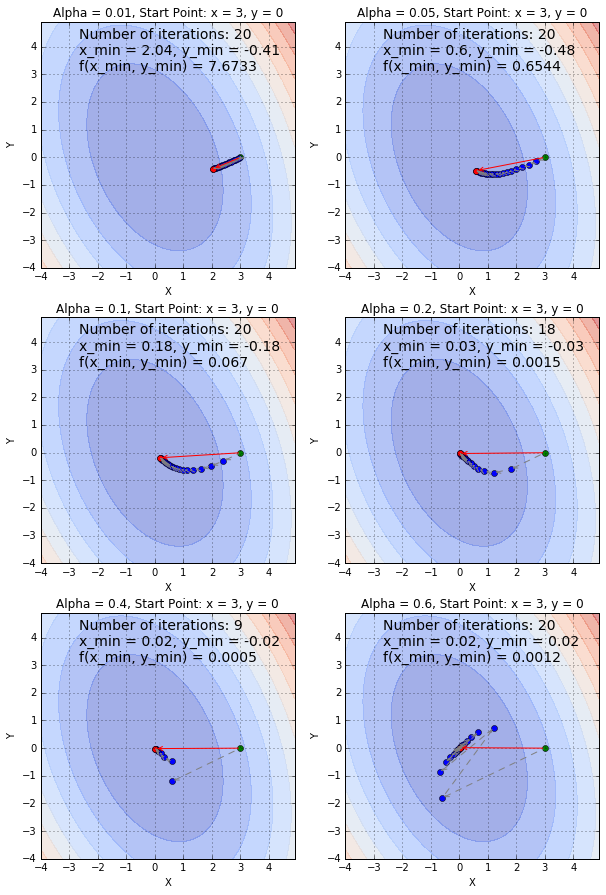

In [51]:
st_x = 3
st_y = 0
maxIter = 20
err = 0.001
alphas = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6]

plotGraphics2D(st_x, st_y, maxIter, err, f, dfx, dfy, x, y, alphas)

[(-1.7684393261154836, -0.9505323885182524),
 (-0.276141788915557, 0.08234413349298525),
 (-0.06278313395272495, 0.058793520637844356),
 (-0.027504567910399992, 0.027471013478399996),
 (-0.0139648, 0.014028800000000001),
 (-0.028823043112729263, -0.028823032117612987)]

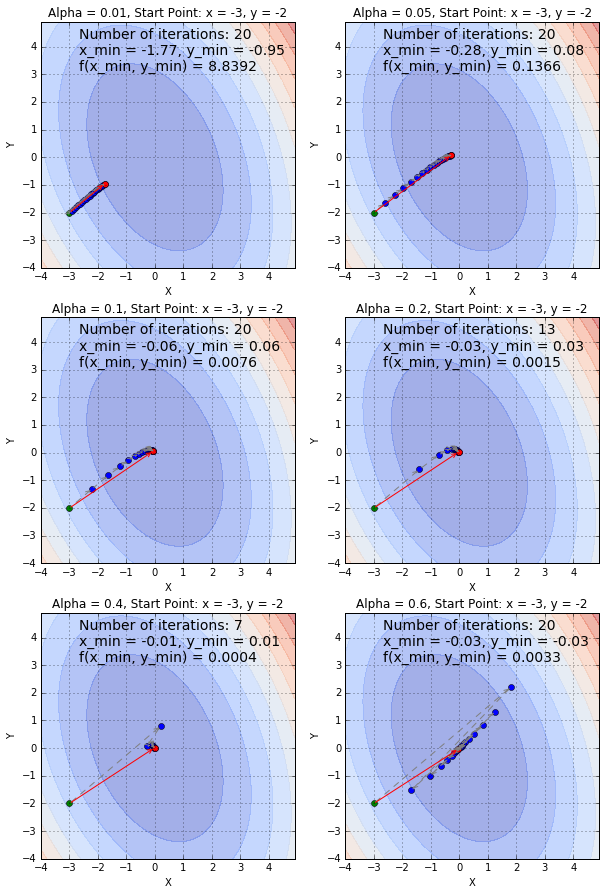

In [52]:
st_x = -3
st_y = -2
maxIter = 20
err = 0.001
alphas = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6]

plotGraphics2D(st_x, st_y, maxIter, err, f, dfx, dfy, x, y, alphas)

<a name = "4b"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            b. Градиентный спуск в задаче линейной регрессии
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#4b">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#5">Далее</a>
            </div>
        </div>
    </div>
</div>

In [53]:
sx = df1["high_GPA"]
sy = df1["univ_GPA"]

<p>Определяем исходную функцию потерь и её частные производные</p>

In [54]:
# Количество элементов в выборке
n = len(sx)

# Функция потерь (ошибки)  
err = lambda x, y, w0, w1: 1 / n * sum([(w1 * x[i] + w0 - y[i]) ** 2 for i in range(n)])

# Частные производные от функции потерь
derr_w0 = lambda x, y, w0, w1: 2 / n * sum([1 * (w1 * x[i] + w0 - y[i]) for i in range(n)])
derr_w1 = lambda x, y, w0, w1: 2 / n * sum([x[i] * (w1 * x[i] + w0 - y[i]) for i in range(n)])

<p>Задаем критерии поиска</p>

In [55]:
# Критерии поиска
iter_num = 200
min_err = 0.0001 #разность между текущим и предыдущим положениями функции

# Параметр альфа
alpha = 0.05

<p>Выполняем градиентный спуск для поиска коэффициентов линейной регрессии</p>

In [56]:
i = 0
w0_gd = 0; w1_gd = 0
w0_prev = 4; w1_prev = 4

while i < iter_num:

    w0_gd = w0_prev - alpha * derr_w0(sx, sy, w0_prev, w1_prev)
    w1_gd = w1_prev - alpha * derr_w1(sx, sy, w0_prev, w1_prev)

    if abs(err(sx, sy, w0_gd, w1_gd) - err(sx, sy, w0_prev, w1_prev)) <= min_err:
        break

    w0_prev = w0_gd
    w1_prev = w1_gd

    i += 1

w0_gd, w1_gd, i

(2.1214791770426933, 0.34998333757603456, 200)

<p>Задаем линию регрессии с учетом найденных коэффициентов</p>

In [57]:
f_pred_gd = lambda x: w1_gd * x + w0_gd

<p>Отображаем линию регрессии</p>

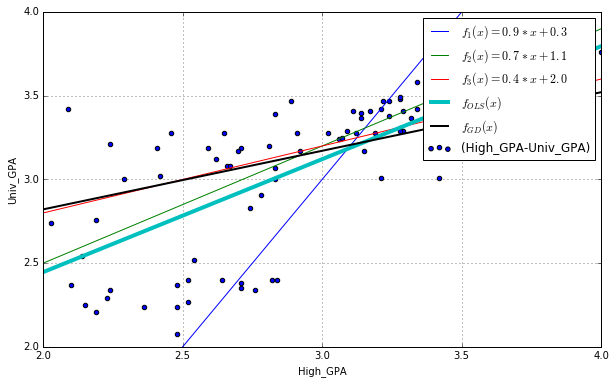

In [58]:
x_line = np.array([1.5, 4.5])

plt.figure("3", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx, sy, label="(High_GPA-Univ_GPA)")
plt.plot(x_line, f_pred_1(x_line), "-", label="$f_1(x)=0.9*x+0.3$")
plt.plot(x_line, f_pred_2(x_line), "-", label="$f_2(x)=0.7*x+1.1$")
plt.plot(x_line, f_pred_3(x_line), "-", label="$f_3(x)=0.4*x+2.0$")
plt.plot(x_line, f_pred_ols(x_line), "-", linewidth=4, 
         label="$f_{OLS}(x)$")
plt.plot(x_line, f_pred_gd(x_line), "-", linewidth=2, color="black",
         label="$f_{GD}(x)$")

plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

plt.axis([2, 4, 2, 4])

plt.grid(True)
ax.set_axisbelow(True) 

plt.legend()

plt.show()

<p>Определяем ошибку при градиентном спуске</p>

In [59]:
err_gd = ((f_pred_gd(sx) - sy)**2).sum()
err_gd

11.154790616794774

<p>Выводим все значения полученных ошибок</p>

In [60]:
err_1, err_2, err_3, err_ols, err_gd

(56.9407,
 8.858585999999994,
 10.604604000000004,
 8.158723371974174,
 11.154790616794774)

<p>Построим контурные графики для функции потерь (ошибки)</p>

In [61]:
coord_w0 = np.arange(-4, 5, 0.1) #Значения x c шагом 0.1
coord_w1 = np.arange(-4, 5, 0.1) #Значения x c шагом 0.1

W0, W1 = np.meshgrid(coord_w0, coord_w1)

In [62]:
coord_w0_large = np.arange(-400, 500, 1)
coord_w1_large = np.arange(-400, 500, 1)

W0_large, W1_large = np.meshgrid(coord_w0_large, coord_w1_large)

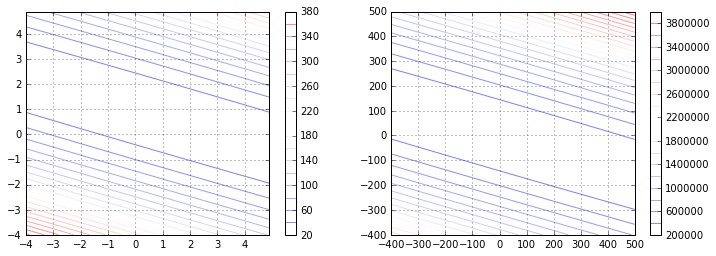

In [63]:
plt.figure("12",figsize=[12, 4])

plt.subplot(1,2,1)
plt.contour(W0, W1, err(sx, sy, W0, W1), 20, cmap=cm.bwr, alpha=0.5)
plt.grid(True)
plt.colorbar()

plt.subplot(1,2,2)
plt.contour(W0_large, W1_large, err(sx, sy, W0_large, W1_large), 20, cmap=cm.bwr, alpha=0.5)
plt.grid(True)
plt.colorbar()

plt.show()

<p>Стандартизируем иcходные значения выборки</p>

In [64]:
# По x
sx_mean = sx.mean()
sx_std = sx.std()

sx_stand = sx.apply(lambda el: (el - sx_mean) / sx_std)
sx_stand.head(5)

0    0.723230
1   -0.573717
2   -1.077010
3    1.149093
4    0.316724
Name: high_GPA, dtype: float64

In [65]:
# По y
sy_mean = sy.mean()
sy_std = sy.std()

sy_stand = sy.apply(lambda el: (el - sy_mean) / sy_std)
sy_stand.head(5)

0    0.776270
1   -0.587793
2   -1.728238
3    0.664461
4    0.664461
Name: univ_GPA, dtype: float64

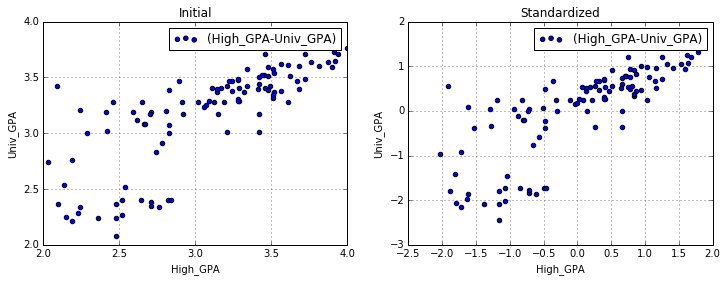

In [66]:
x_line = np.array([1.5, 4.5])

plt.figure("3", figsize=[12, 4])

ax = plt.subplot(1,2,1)

plt.scatter(sx, sy, label="(High_GPA-Univ_GPA)")
plt.title("Initial")
plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

plt.axis([2, 4, 2, 4])

plt.grid(True)
ax.set_axisbelow(True) 

plt.legend()

ax = plt.subplot(1,2,2)

plt.scatter(sx_stand, sy_stand, label="(High_GPA-Univ_GPA)")
plt.title("Standardized")
plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

plt.grid(True)
ax.set_axisbelow(True) 

plt.legend()


plt.show()

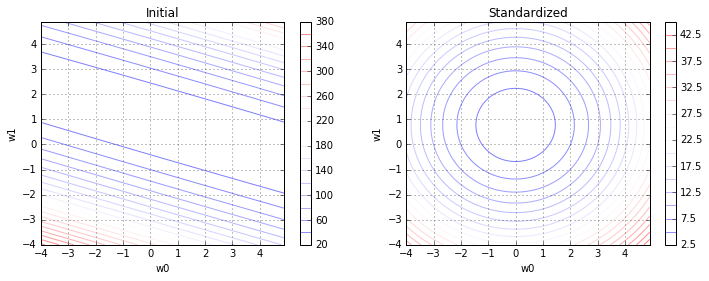

In [67]:
plt.figure("12", figsize=[12, 4])

plt.subplot(1,2,1)
plt.contour(W0, W1, err(sx, sy, W0, W1), 20, cmap=cm.bwr, alpha=0.5)
plt.title("Initial")
plt.xlabel("w0")
plt.ylabel("w1")
plt.grid(True)
plt.colorbar()

plt.subplot(1,2,2)
plt.contour(W0, W1, err(sx_stand, sy_stand, W0, W1), 20, cmap=cm.bwr, alpha=0.5)
plt.title("Standardized")
plt.xlabel("w0")
plt.ylabel("w1")
plt.grid(True)
plt.colorbar()

plt.show()

In [68]:
# Критерии поиска
iter_num_stand = 100
min_err_stand = 0.0001

# Параметр альфа
alpha_stand = 0.05

In [69]:
i = 0
w0_gd_stand = 0; w1_gd_stand = 0
w0_prev = 4; w1_prev = 4

while i < iter_num_stand:

    w0_gd_stand = w0_prev - alpha_stand * derr_w0(sx_stand, sy_stand, w0_prev, w1_prev)
    w1_gd_stand = w1_prev - alpha_stand * derr_w1(sx_stand, sy_stand, w0_prev, w1_prev)

    if abs(err(sx_stand, sy_stand, w0_gd_stand, w1_gd_stand) - err(sx_stand, sy_stand, w0_prev, w1_prev)) <= min_err_stand:
        break

    w0_prev = w0_gd_stand
    w1_prev = w1_gd_stand

    i += 1

w0_gd_stand, w1_gd_stand, i

(0.015028408504546984, 0.79236023841551428, 52)

In [70]:
f_pred_gr_stand = lambda x: w1_gd_stand * x + w0_gd_stand

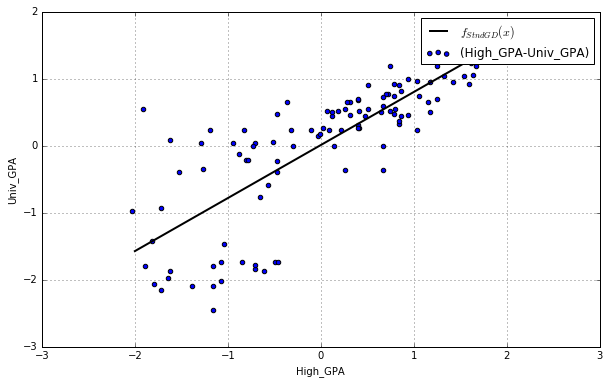

In [71]:
x_line_stand = np.array([-2, 2])

plt.figure("3", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx_stand, sy_stand, label="(High_GPA-Univ_GPA)")
plt.plot(x_line_stand, f_pred_gr_stand(x_line_stand), "-", linewidth=2, color="black",
         label="$f_{StndGD}(x)$")

plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

plt.grid(True)
ax.set_axisbelow(True) 

plt.legend()

plt.show()

In [72]:
f_pred_gr_stand_recover = lambda x: sy_std * (w1_gd_stand / sx_std * (x - sx_mean)) + sy_mean

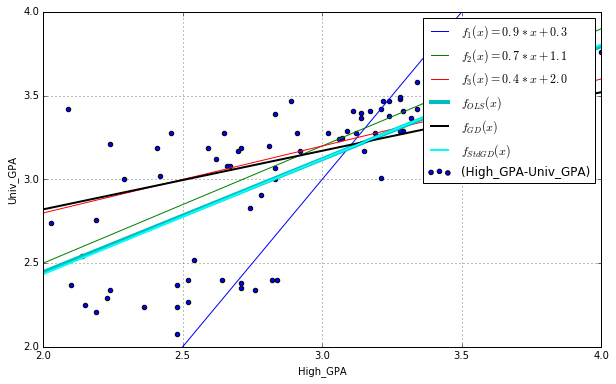

In [73]:
x_line = np.array([1.5, 4.5])

plt.figure("3", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx, sy, label="(High_GPA-Univ_GPA)")
plt.plot(x_line, f_pred_1(x_line), "-", label="$f_1(x)=0.9*x+0.3$")
plt.plot(x_line, f_pred_2(x_line), "-", label="$f_2(x)=0.7*x+1.1$")
plt.plot(x_line, f_pred_3(x_line), "-", label="$f_3(x)=0.4*x+2.0$")
plt.plot(x_line, f_pred_ols(x_line), "-", linewidth=4, 
         label="$f_{OLS}(x)$")
plt.plot(x_line, f_pred_gd(x_line), "-", linewidth=2, color="black",
         label="$f_{GD}(x)$")
plt.plot(x_line, f_pred_gr_stand_recover(x_line), "-", linewidth=2, color="cyan",
         label="$f_{StdGD}(x)$")

plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

plt.axis([2, 4, 2, 4])

plt.grid(True)
ax.set_axisbelow(True) 

plt.legend()

plt.show()

In [74]:
err_gr_stand = ((f_pred_gr_stand_recover(sx) - sy)**2).sum()
err_gr_stand

8.162129405331285

In [75]:
err_1, err_2, err_3, err_ols, err_gd, err_gr_stand

(56.9407,
 8.858585999999994,
 10.604604000000004,
 8.158723371974174,
 11.154790616794774,
 8.162129405331285)

<p>Грубая проверка перебором</p>

In [77]:
f(W0, W1).min(), f_stand(W0, W1).min()

NameError: name 'f_stand' is not defined

In [ ]:
inxd_ws = np.argwhere(f(W0, W1).min() == f(W0, W1))
inxd_ws

In [ ]:
W0[inxd_ws[0,0], inxd_ws[0,1]], W1[inxd_ws[0,0], inxd_ws[0,1]]

In [ ]:
inxd_ws_stand = np.argwhere(f_stand(W0, W1).min() == f_stand(W0, W1))
inxd_ws_stand

In [ ]:
W0[inxd_ws_stand[0,0], inxd_ws_stand[0,1]], W1[inxd_ws_stand[0,0], inxd_ws_stand[0,1]]